# CSE474/574 - Programming Assignment 2

## Part 3 - Image Classification with Deep[er] neural networks

For this part, we will use `keras` with a `tensorflow` backend, instead of directly using `tensorflow`, as in Part 1. See [here](https://anaconda.org/conda-forge/keras) for installation instructions.

In [4]:
from __future__ import print_function
from keras.models import Sequential
from keras.layers import Dense, Activation

import numpy as np
import random as rd
import time
import pickle
import os
from PIL import Image
#os.environ["CUDA_VISIBLE_DEVICES"]="1"
import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [5]:
classes = ['apple', 'airplane', 'basketball', 'axe', 'banana', 'horse', 'arm', 'alarm clock', 'ant', 'bed']

In [6]:
# load data
train_data,train_label,test_data,test_label = pickle.load(open('AI_quick_draw_sm.pickle','rb'))

In [7]:
# for some macosx installations, conflicting copies of mpilib causes trouble with tensorflow.
# use the following two lines to resolve that issue
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [9]:
n_classes = len(np.unique(train_label))
# convert labels to 0-1 hot encoding
train_label_01 = np.zeros((train_label.shape[0], n_classes))
a = np.arange(train_label.shape[0], dtype=np.int64)
b = np.array(train_label, dtype=np.int64).reshape((train_label.shape[0],))
train_label_01[a, b] = 1

test_label_01 = np.zeros((test_label.shape[0], n_classes))
c = np.arange(test_label.shape[0], dtype=np.int64)
d = np.array(test_label, dtype=np.int64).reshape((test_label.shape[0],))
test_label_01[c, d] = 1

**WARNING**: This cell will take a significantly long time to run

In [62]:
model = Sequential()
M = 90
L = 2
activation = 'relu' # other options 'relu', 'tanh'
# this is the first hidden layer
model.add(Dense(M, activation=activation, input_dim=train_data.shape[1]))
# you can add more Dense layers here
for l in range(1,L):
    model.add(Dense(M, activation=activation, input_dim=M))
# this is the output layer
model.add(Dense(n_classes, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [63]:
model.summary()

Model: "sequential_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_288 (Dense)            (None, 90)                70650     
_________________________________________________________________
dense_289 (Dense)            (None, 90)                8190      
_________________________________________________________________
dense_290 (Dense)            (None, 10)                910       
Total params: 79,750
Trainable params: 79,750
Non-trainable params: 0
_________________________________________________________________


In [64]:
st = time.time()
model.fit(train_data, train_label_01, epochs=50, batch_size=32)
en = time.time()
print("Training completed in {:.2f} seconds.".format(en-st))

Epoch 1/50
782/782 [==============================] - 1s 1ms/step - loss: 4.2289 - accuracy: 0.4346
Epoch 2/50
782/782 [==============================] - 1s 1ms/step - loss: 1.4418 - accuracy: 0.5898
Epoch 3/50
782/782 [==============================] - 1s 1ms/step - loss: 1.2722 - accuracy: 0.6429
Epoch 4/50
782/782 [==============================] - 1s 1ms/step - loss: 1.1591 - accuracy: 0.6711
Epoch 5/50
782/782 [==============================] - 1s 1ms/step - loss: 1.0751 - accuracy: 0.6928
Epoch 6/50
782/782 [==============================] - 1s 1ms/step - loss: 1.0190 - accuracy: 0.7102
Epoch 7/50
782/782 [==============================] - 1s 1ms/step - loss: 0.9703 - accuracy: 0.7256
Epoch 8/50
782/782 [==============================] - 1s 1ms/step - loss: 0.9277 - accuracy: 0.7332
Epoch 9/50
782/782 [==============================] - 1s 1ms/step - loss: 0.9068 - accuracy: 0.7476
Epoch 10/50
782/782 [==============================] - 1s 1ms/step - loss: 0.8844 - accuracy: 0.7522

In [65]:
train_predicted = model.predict_classes(train_data)
acc_train = np.where(train_label == train_predicted)[0].shape[0]/train_data.shape[0]
print('Training set Accuracy: {:.2f}%'.format(100 * acc_train))

test_predicted = model.predict_classes(test_data)
acc_test = np.where(test_label == test_predicted)[0].shape[0]/test_data.shape[0]
print('Testing set Accuracy : {:.2f}%'.format(100 * acc_test))

Training set Accuracy: 86.87%
Testing set Accuracy : 71.76%


In [48]:
def optimalL(L):
    out_put = []
    model = Sequential()
    M = 90
    activation = 'sigmoid' 
    model.add(Dense(M, activation=activation, input_dim=train_data.shape[1]))
    for l in range(1,L):
        model.add(Dense(M, activation=activation, input_dim=M))
        # this is the output layer
    model.add(Dense(n_classes, activation='softmax'))
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    st = time.time()
    model.fit(train_data, train_label_01, epochs=50, batch_size=32)
    en = time.time()
    out_put.append(round(en-st , 2))
    
    train_predicted = model.predict_classes(train_data)
    acc_train = np.where(train_label == train_predicted)[0].shape[0]/train_data.shape[0]
    out_put.append(100 * acc_train)

    test_predicted = model.predict_classes(test_data)
    acc_test = np.where(test_label == test_predicted)[0].shape[0]/test_data.shape[0]
    out_put.append(100 * acc_test)
    
    return out_put

In [49]:
outcome_list = []
for i in range(1,6):
    outcome_list.append(optimalL(i))
    print("This is " + str(i)+" times loop, the coutcome is " + str(outcome_list))
    

Epoch 1/50
782/782 [==============================] - 1s 1ms/step - loss: 1.4653 - accuracy: 0.5220
Epoch 2/50
782/782 [==============================] - 1s 944us/step - loss: 1.1293 - accuracy: 0.6327
Epoch 3/50
782/782 [==============================] - 1s 939us/step - loss: 1.0418 - accuracy: 0.6607
Epoch 4/50
782/782 [==============================] - 1s 860us/step - loss: 0.9975 - accuracy: 0.6795
Epoch 5/50
782/782 [==============================] - 1s 922us/step - loss: 0.9638 - accuracy: 0.6910
Epoch 6/50
782/782 [==============================] - 1s 916us/step - loss: 0.9459 - accuracy: 0.7000
Epoch 7/50
782/782 [==============================] - 1s 931us/step - loss: 0.9282 - accuracy: 0.7030
Epoch 8/50
782/782 [==============================] - 1s 941us/step - loss: 0.9077 - accuracy: 0.7140
Epoch 9/50
782/782 [==============================] - 1s 944us/step - loss: 0.8920 - accuracy: 0.7155
Epoch 10/50
782/782 [==============================] - 1s 958us/step - loss: 0.8897 

782/782 [==============================] - 1s 1ms/step - loss: 0.7324 - accuracy: 0.7672
Epoch 31/50
782/782 [==============================] - 1s 1ms/step - loss: 0.7266 - accuracy: 0.7675
Epoch 32/50
782/782 [==============================] - 1s 1ms/step - loss: 0.7292 - accuracy: 0.7675
Epoch 33/50
782/782 [==============================] - 1s 1ms/step - loss: 0.7273 - accuracy: 0.7671
Epoch 34/50
782/782 [==============================] - 1s 1ms/step - loss: 0.7237 - accuracy: 0.7701
Epoch 35/50
782/782 [==============================] - 1s 1ms/step - loss: 0.7131 - accuracy: 0.7739
Epoch 36/50
782/782 [==============================] - 1s 1ms/step - loss: 0.7113 - accuracy: 0.7734
Epoch 37/50
782/782 [==============================] - 1s 1ms/step - loss: 0.7046 - accuracy: 0.7774
Epoch 38/50
782/782 [==============================] - 1s 1ms/step - loss: 0.7133 - accuracy: 0.7717
Epoch 39/50
782/782 [==============================] - 1s 1ms/step - loss: 0.7026 - accuracy: 0.7739
Ep

782/782 [==============================] - 1s 1ms/step - loss: 0.9235 - accuracy: 0.6953
Epoch 9/50
782/782 [==============================] - 1s 1ms/step - loss: 0.8978 - accuracy: 0.7059
Epoch 10/50
782/782 [==============================] - 1s 1ms/step - loss: 0.8793 - accuracy: 0.7128
Epoch 11/50
782/782 [==============================] - 1s 1ms/step - loss: 0.8688 - accuracy: 0.7195
Epoch 12/50
782/782 [==============================] - 1s 1ms/step - loss: 0.8605 - accuracy: 0.7208
Epoch 13/50
782/782 [==============================] - 1s 1ms/step - loss: 0.8393 - accuracy: 0.7302
Epoch 14/50
782/782 [==============================] - 1s 1ms/step - loss: 0.8317 - accuracy: 0.7342
Epoch 15/50
782/782 [==============================] - 1s 1ms/step - loss: 0.8187 - accuracy: 0.7372
Epoch 16/50
782/782 [==============================] - 1s 1ms/step - loss: 0.8199 - accuracy: 0.7351
Epoch 17/50
782/782 [==============================] - 1s 1ms/step - loss: 0.8082 - accuracy: 0.7425
Epo

782/782 [==============================] - 1s 1ms/step - loss: 0.7511 - accuracy: 0.7640
Epoch 38/50
782/782 [==============================] - 1s 1ms/step - loss: 0.7461 - accuracy: 0.7638
Epoch 39/50
782/782 [==============================] - 1s 1ms/step - loss: 0.7435 - accuracy: 0.7620
Epoch 40/50
782/782 [==============================] - 1s 1ms/step - loss: 0.7367 - accuracy: 0.7665
Epoch 41/50
782/782 [==============================] - 1s 1ms/step - loss: 0.7302 - accuracy: 0.7701
Epoch 42/50
782/782 [==============================] - 1s 1ms/step - loss: 0.7334 - accuracy: 0.7684
Epoch 43/50
782/782 [==============================] - 1s 1ms/step - loss: 0.7311 - accuracy: 0.7682
Epoch 44/50
782/782 [==============================] - 1s 1ms/step - loss: 0.7347 - accuracy: 0.7648
Epoch 45/50
782/782 [==============================] - 1s 1ms/step - loss: 0.7265 - accuracy: 0.7700
Epoch 46/50
782/782 [==============================] - 1s 1ms/step - loss: 0.7221 - accuracy: 0.7716
Ep

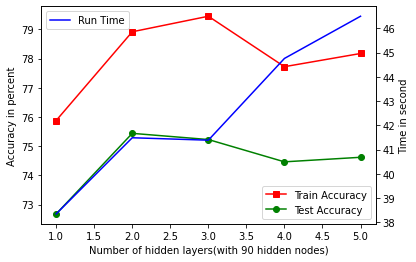

In [53]:
train_acc =[]
test_acc = []
run_time = []

for i in range(len(outcome_list)):
    runtime,trainacc,testacc = outcome_list[i]
    run_time.append(runtime)
    train_acc.append(trainacc)
    test_acc.append(testacc)

x = [1,2,3,4,5]
k1 = train_acc 
k2 = test_acc 
k3 = run_time
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x,k1,'s-',color = 'r',label="Train Accuracy")
ax1.plot(x,k2,'o-',color = 'g',label="Test Accuracy")
ax2.plot(x,k3,color = 'b',label="Run Time")
ax1.set_xlabel("Number of hidden layers(with 90 hidden nodes)")
ax1.set_ylabel("Accuracy in percent")
ax2.set_ylabel("Time in second")
ax1.legend(loc = 4)
ax2.legend(loc = 2)
plt.show()